Import Library

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_csv('/content/drive/MyDrive/bigdata/studentRegistration.csv')

EDA

In [11]:
df

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [12]:
# Melihat informasi dasar tentang dataset
print("Informasi Dataset:")
print(df.info())

# Menampilkan 5 baris pertama dari dataset
print("\n5 Baris Pertama Dataset:")
print(df.head())

# Menampilkan 5 baris terakhir dari dataset
print("\n5 Baris terakhir Dataset:")
print(df.tail())

# Statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif:")
print(df.describe())

# Melihat jumlah missing values pada setiap kolom
print("\nJumlah Missing Values pada Setiap Kolom:")
print(df.isnull().sum())

# shape dataset
print("\nShape Dataset:")
print(df.shape)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB
None

5 Baris Pertama Dataset:
  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0       

Preprocessing

In [13]:
# Menampilkan jumlah missing values pada setiap kolom
missing_data = df.isnull().sum()

# Menampilkan kolom-kolom dengan missing values (jika ada)
columns_with_missing_data = missing_data[missing_data > 0]
print("Kolom dengan Missing Values:")
print(columns_with_missing_data)

# Menampilkan jumlah total missing values dalam dataset
total_missing_values = missing_data.sum()
print("\nTotal Missing Values dalam Dataset:", total_missing_values)

Kolom dengan Missing Values:
date_registration         45
date_unregistration    22521
dtype: int64

Total Missing Values dalam Dataset: 22566


In [14]:
# Mengganti nilai yang hilang dengan rata-rata kolom date_registration
mean_date_registration = df['date_registration'].mean()
df['date_registration'].fillna(mean_date_registration, inplace=True)

# Mengganti nilai yang hilang dengan median kolom date_unregistration
median_date_unregistration = df['date_unregistration'].median()
df['date_unregistration'].fillna(median_date_unregistration, inplace=True)

In [15]:
# Menampilkan jumlah missing values pada setiap kolom
missing_data = df.isnull().sum()

# Menampilkan kolom-kolom dengan missing values (jika ada)
columns_with_missing_data = missing_data[missing_data > 0]
print("Kolom dengan Missing Values:")
print(columns_with_missing_data)

# Menampilkan jumlah total missing values dalam dataset
total_missing_values = missing_data.sum()
print("\nTotal Missing Values dalam Dataset:", total_missing_values)

Kolom dengan Missing Values:
Series([], dtype: int64)

Total Missing Values dalam Dataset: 0


In [16]:
df

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,27.0
1,AAA,2013J,28400,-53.0,27.0
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,27.0
4,AAA,2013J,32885,-176.0,27.0
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,27.0
32589,GGG,2014J,2645731,-23.0,27.0
32590,GGG,2014J,2648187,-129.0,27.0
32591,GGG,2014J,2679821,-49.0,101.0


Visualitation

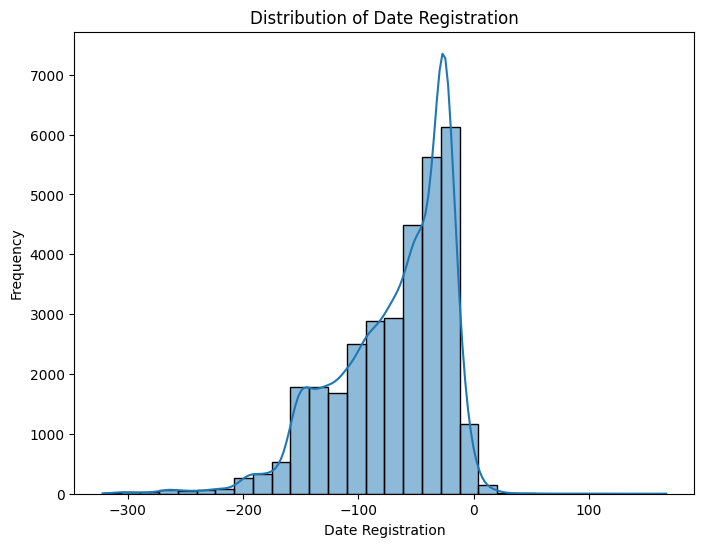

In [17]:
# Contoh visualisasi histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['date_registration'], bins=30, kde=True)
plt.xlabel('Date Registration')
plt.ylabel('Frequency')
plt.title('Distribution of Date Registration')
plt.show()

<ipython-input-18-ab9c1ed59bdd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


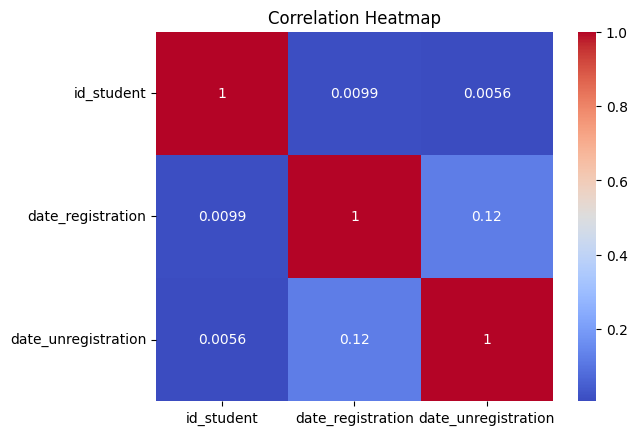

In [18]:
# Contoh analisis korelasi
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

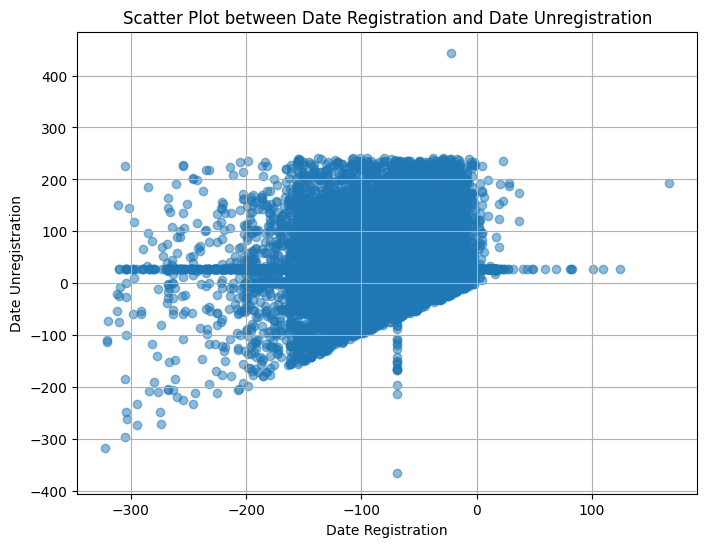

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df['date_registration'], df['date_unregistration'], alpha=0.5)
plt.xlabel('Date Registration')
plt.ylabel('Date Unregistration')
plt.title('Scatter Plot between Date Registration and Date Unregistration')
plt.grid(True)
plt.show()

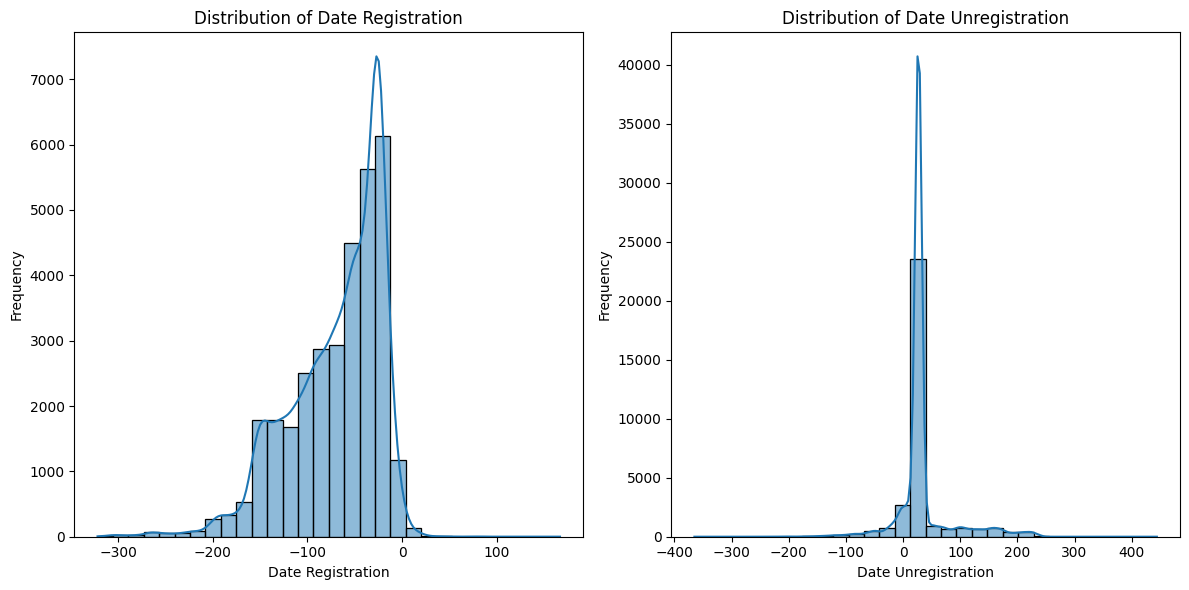

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['date_registration'], bins=30, kde=True)
plt.xlabel('Date Registration')
plt.ylabel('Frequency')
plt.title('Distribution of Date Registration')

plt.subplot(1, 2, 2)
sns.histplot(df['date_unregistration'], bins=30, kde=True)
plt.xlabel('Date Unregistration')
plt.ylabel('Frequency')
plt.title('Distribution of Date Unregistration')

plt.tight_layout()
plt.show()

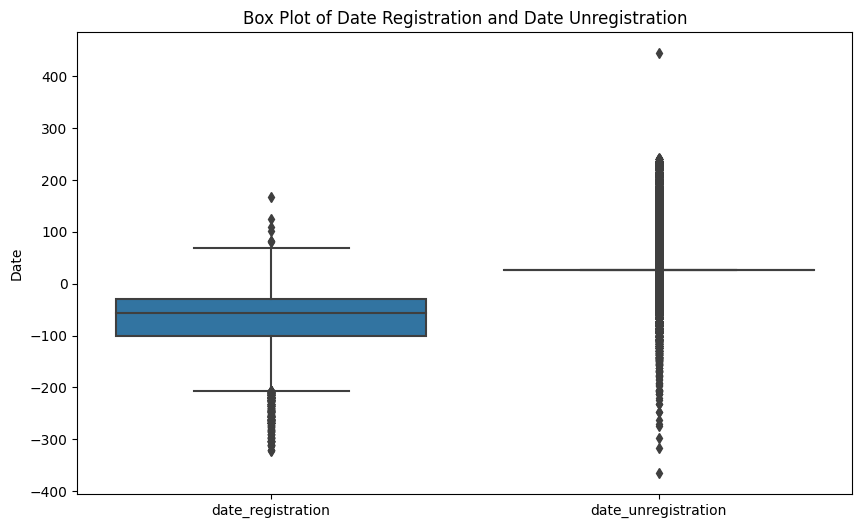

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['date_registration', 'date_unregistration']], orient='vertical')
plt.ylabel('Date')
plt.title('Box Plot of Date Registration and Date Unregistration')
plt.show()